In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/hitters.csv')

In [20]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
from sklearn.tree import export_graphviz
import IPython
import graphviz
import re

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [21]:
# fill in missing values
df['Salary'].fillna(df.Salary.mean(), inplace=True)
# create x and y columns
X = df.loc[:, df.columns != 'Salary']
y = df['Salary']
# create dummy variables
X = pd.get_dummies(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1)

In [7]:
tree.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}

In [25]:
from sklearn.model_selection import cross_val_score

rf_scores = []

min_samples_leaf = [1, 5, 10, 25, 50]

for leaf_number in min_samples_leaf:
    tree.set_params(min_samples_leaf=leaf_number)
    scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=10)
    rf_scores.append((np.mean(scores), leaf_number))

In [26]:
rf_scores

[(-0.18768522728236142, 1),
 (0.03520689984861273, 5),
 (0.23652883315643983, 10),
 (0.34093901108823016, 25),
 (0.30512582926340126, 50)]

In [27]:
tree.set_params(max_depth=None)

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [29]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
rf.fit(X, y)

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
rf.n_estimators

10

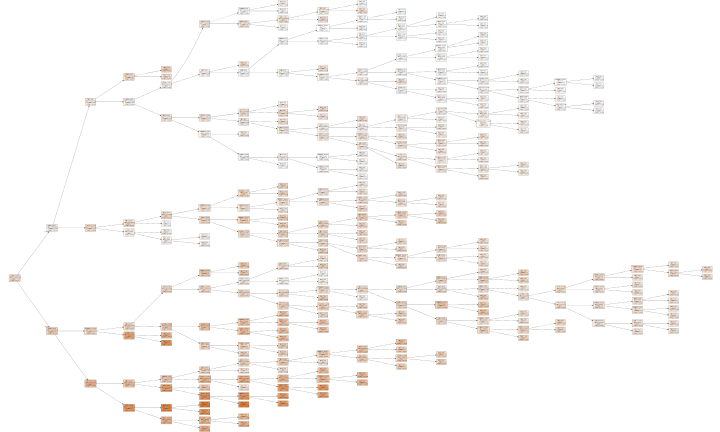

In [35]:
draw_tree(rf.estimators_[1], X)

In [40]:
df.shape[1]

20

In [37]:
X_test.shape

(65, 22)

In [41]:
rf_scores = []

max_features = [0.5, 'sqrt', 'log2']

for feature in max_features:
    rf.set_params(max_features=feature)
    scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
    rf_scores.append((np.mean(scores), feature))

In [42]:
rf_scores

[(0.42610594343500274, 0.5),
 (0.3750275893574305, 'sqrt'),
 (0.3773133680048559, 'log2')]

In [43]:
np.sqrt(22)

4.69041575982343